# Libraries

In [30]:
from utils import *

'''Plots settings'''
L = Leonardo()
plt.style.use(gstyle + 'dark-theme.mplstyle')   
# font global settings
font_path = 'Adelle-Regular.ttf'
font_manager.fontManager.addfont(font_path) # adding it
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = font_manager.FontProperties(fname=font_path).get_name()

# Data overview and background

Dataset from kaggle:
https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists

# Read data

In [31]:
train = pd.read_csv('./data/hr-analytics/aug_train.csv')

In [32]:
train.shape

(19158, 14)

# Features engineering

### Imputing missing values

In [33]:
train.loc[:,train.isna().any()]

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,Male,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,Male,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,NaN,Full time course,Graduate,STEM,5,NaN,NaN,never
3,NaN,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never
4,Male,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4
...,...,...,...,...,...,...,...,...
19153,Male,no_enrollment,Graduate,Humanities,14,NaN,NaN,1
19154,Male,no_enrollment,Graduate,STEM,14,NaN,NaN,4
19155,Male,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4
19156,Male,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2


In [34]:
# for now
train = train.dropna().copy()

In [35]:
train['target'] = train['target'].map({1.0:'1',0.0:'0'})

In [36]:
train.replace(
    {
    'experience': 
        {'>20':20,
         '<1':0
         }
        },inplace=True)

In [37]:
test['experience'].unique()

array(['15', '20', '13', '7', '5', '16', '11', 0, '18', '19', '12', '10',
       '9', '2', '6', '4', '14', '3', '8', '17', '1'], dtype=object)

# EDA

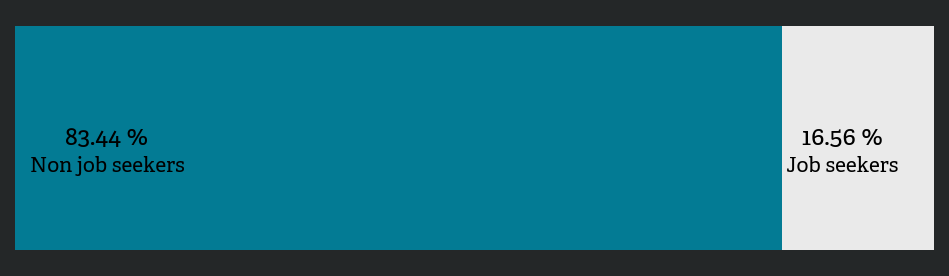

In [38]:
L.binary_ratio_plot(train,'target','Non job seekers','Job seekers',font_color='black')

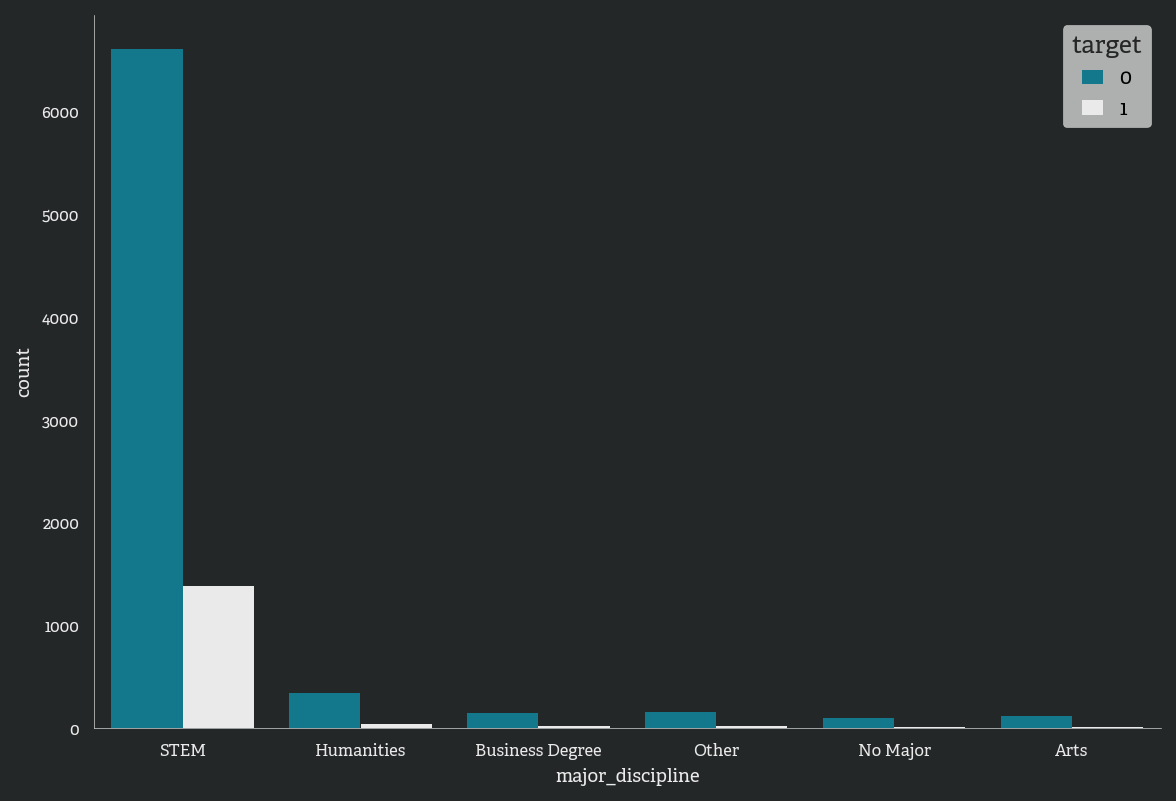

In [39]:
fig, ax = plt.subplots(1,1, dpi=150)
sns.countplot(train,x='major_discipline',hue='target')
plt.show()

# AutoML